In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/ECG/mitbih_train.csv", header = None)
test_data = pd.read_csv("/content/drive/MyDrive/ECG/mitbih_test.csv", header = None)

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

###### EDA

In [ ]:
# train_data.isnull.sum()

AttributeError: ignored

In [ ]:
train_data.shape

(87554, 188)

In [ ]:
#class of ECG data
train_data.iloc[:, -1].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int')

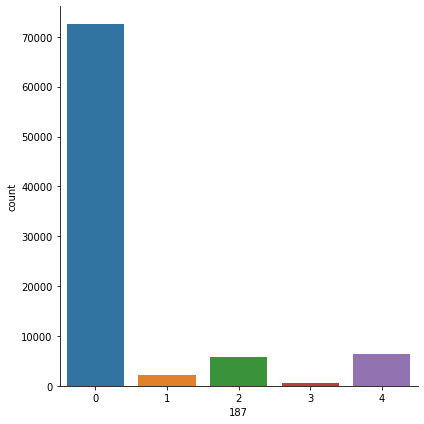

In [ ]:
# Display counts of classes
sns.catplot(x = 187, kind = "count", data = train_data, height = 6)

In [ ]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

An Electro Cardio Gram (ECG) is simple test that can be used to check your heart rhythm and electrical activity.
Classes = [N:0, S:1, V:2, F:3, Q:4] N: Non-ectopic beats (Normal Beats), - S: Supraventricular ectopic beats , V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats.

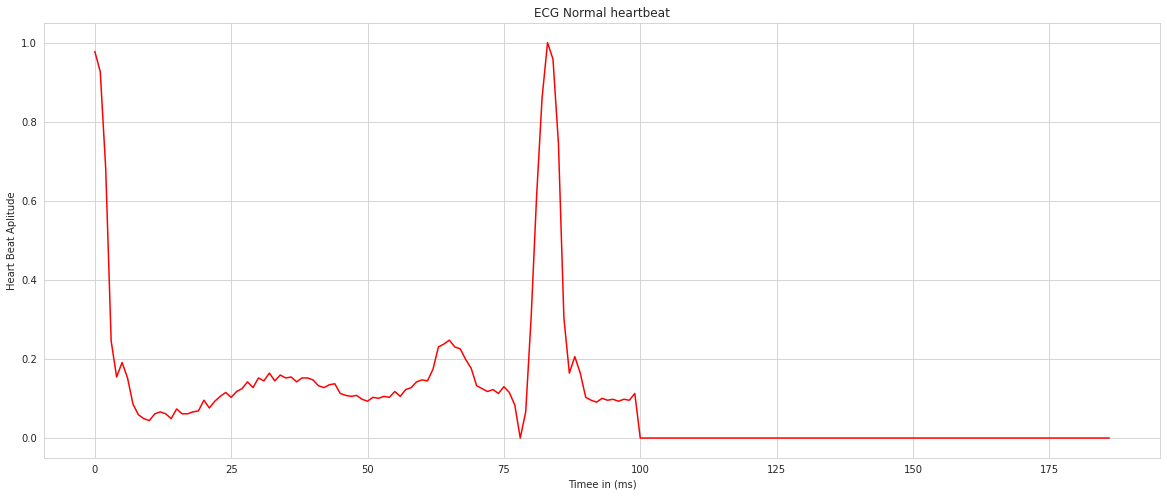

In [ ]:
# Heart beat Visualization
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.title('ECG Normal heartbeat')
plt.xlabel('Timee in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.show()

In [ ]:
# Splitting data into classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

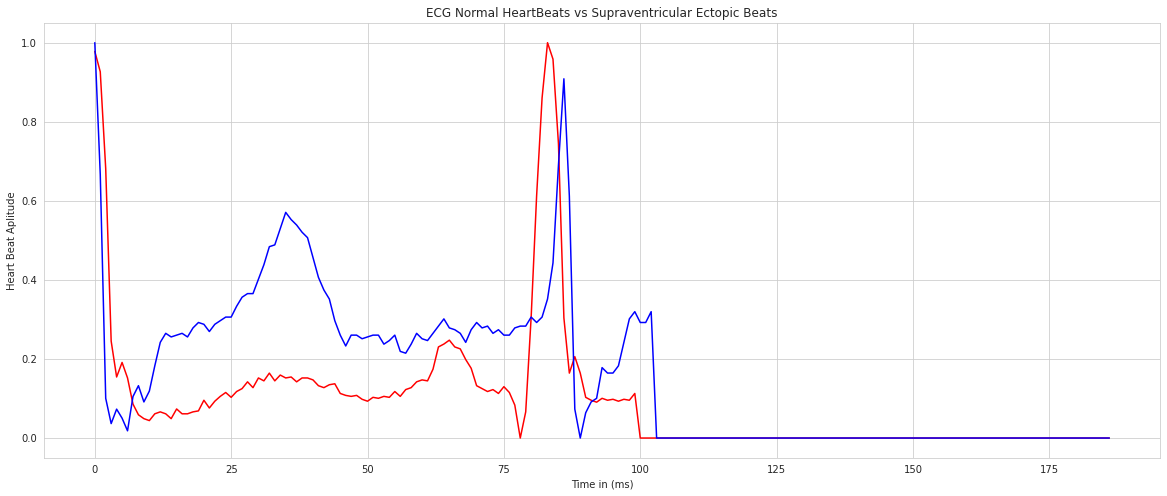

In [ ]:
# compare different classes of heartbeats
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular Ectopic Beats')
plt.title('ECG Normal HeartBeats vs Supraventricular Ectopic Beats')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.show()

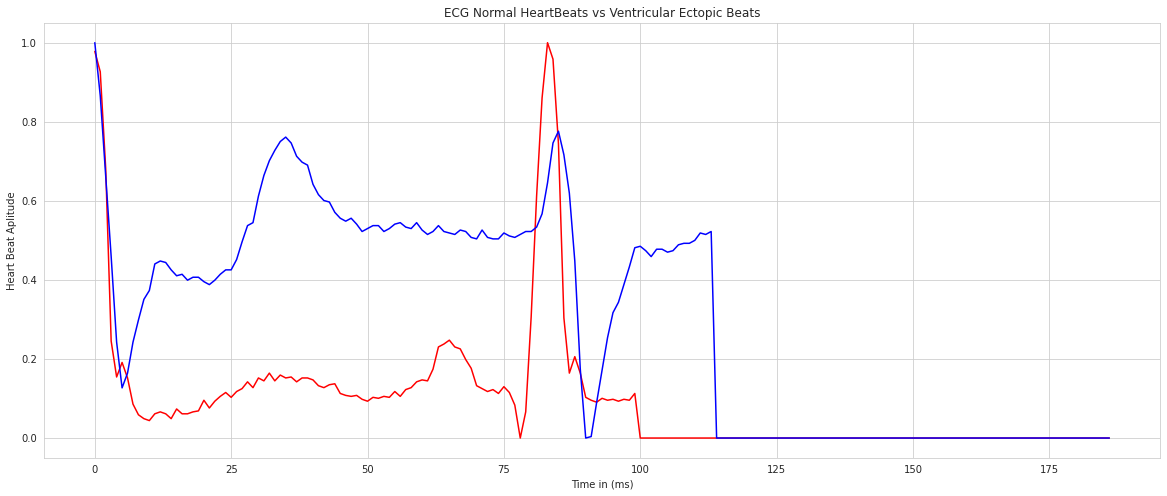

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[1, 0:187], color = 'blue', label = 'Ventricular Ectopic Beats')
plt.title('ECG Normal HeartBeats vs Ventricular Ectopic Beats')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.show()

RESAMPLING 
BOOTSTRAPING TO REGENERATE SAMPLES


In [ ]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)


In [ ]:
# Randomnly select 20000 samples from class = 0 samples
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 123)

In [ ]:
# merge all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
train_df[187].value_counts()

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64

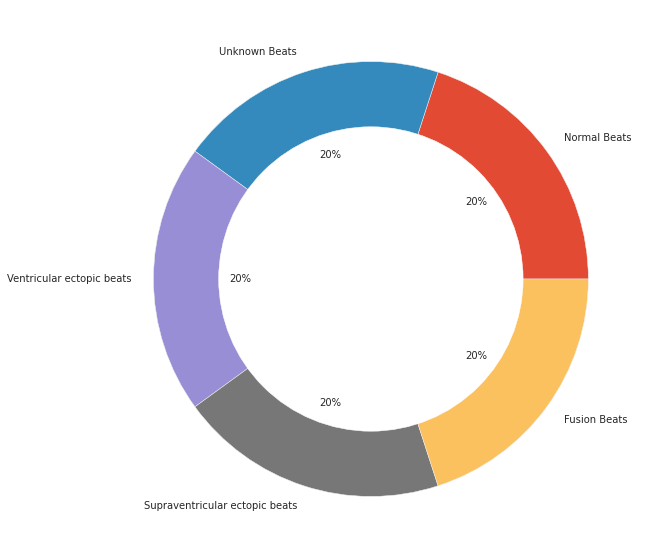

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df[187].value_counts(), labels = ['Normal Beats','Unknown Beats','Ventricular ectopic beats',
                                                  'Supraventricular ectopic beats', 'Fusion Beats'], autopct = '%0.0f%%')
# gcf() - current figure
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show() 

In [ ]:
# train Y
target_train = train_df[187]
target_test = test_data[187]

In [ ]:
target_train.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# convert integer values into categorical one-hot encoding


In [ ]:
# train Y
target_train = train_df[187]
target_test = test_data[187]


In [ ]:
target_train.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# train Y
target_train = train_df[187]
target_test = test_data[187]

In [ ]:
# convert integer values into categorical one-hot encoding
# 0 - [1 0 0 0 0]
# 4 - [0 0 0 0 1]
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [ ]:
y_test = to_categorical(target_test)

In [ ]:
display(y_train)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
x_train = train_df.iloc[:, :-1].values
x_test = test_data.iloc[:, :-1].values

In [ ]:
x_train.shape


(100000, 187)

In [ ]:
# For Conv1D dimentionality must be chaged to 187 x 1 where 187 = num of features & 1 = 1-D Dimentionality of Data
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)
x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)

In [ ]:
x_train.shape

(100000, 187, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
# Avoid Overfitting of NN by Normalizing the samples
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#input_layer
def build_model():
    model = Sequential()
    # Filters = No. of Neurons
    # Padding = 'same' : Zero Padding; Padding = 'valid' : valid padding
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (187,1)))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())
    # Pooling
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - II
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - III
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Flatten 
    model.add(Flatten())

    # Fully Connected Layer (FC - Layer)
    model.add(Dense(units = 64, activation='relu'))
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))
     # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model
    

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train, y_train, epochs = 15, batch_size = 32, validation_data = (x_test, y_test))

In [ ]:

pd.DataFrame(history.history)


In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
# Make Prediction
predict = model.predict(x_test)

In [ ]:
predict

In [ ]:
# Distributed probability to discrete class
yhat = np.argmax(predict, axis = 1)
yhat

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix( target_test,yhat )

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix( target_test,yhat ), annot = True, cmap = 'RdPu', fmt = '0.0f')

In [ ]:
print(classification_report(target_test,yhat))